In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
bank_data = pd.read_csv('bank-full.csv', delimiter=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [7]:
bank_data['housing'] = bank_data['housing'].map({'yes': 1, 'no': 0})
bank_data['loan'] = bank_data['loan'].map({'yes': 1, 'no': 0})
bank_data['default'] = bank_data['default'].map({'yes': 1, 'no': 0})
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


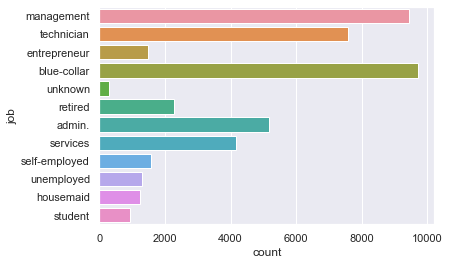

In [8]:
sns.countplot(y='job', data=bank_data)
plt.show()

In [9]:
bank_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
bank_data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
bank_data['marital'] = bank_data['marital'].map({'married': 1, 'single': 0, 'divorced': 2})

In [12]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,0,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [13]:
bank_data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [14]:
bank_data_dummy = pd.get_dummies(bank_data['job'], drop_first=True)
bank_data_new = pd.concat([bank_data_dummy,bank_data],axis=1)
bank_data_new.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0,0,1,0,0,0,0,0,0,...,0,unknown,5,may,261,1,-1,0,unknown,0
1,0,0,0,0,0,0,0,0,1,0,...,0,unknown,5,may,151,1,-1,0,unknown,0
2,0,1,0,0,0,0,0,0,0,0,...,1,unknown,5,may,76,1,-1,0,unknown,0
3,1,0,0,0,0,0,0,0,0,0,...,0,unknown,5,may,92,1,-1,0,unknown,0
4,0,0,0,0,0,0,0,0,0,0,...,0,unknown,5,may,198,1,-1,0,unknown,0


In [15]:
bank_data_new.shape

(45211, 28)

In [16]:
bank_data_new.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [17]:
bank_data_new.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
bank_data_new.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [19]:
bank_data_new['contact'] = bank_data_new['contact'].map({'cellular': 1, 'unknown': 0, 'telephone': 2})
bank_data_new['poutcome'] = bank_data_new['poutcome'].map({'success': 1, 'failure': 0, 'other': 2, 'unknown': 3})

In [20]:
bank_data_new.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0,0,1,0,0,0,0,0,0,...,0,0,5,may,261,1,-1,0,3,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,5,may,151,1,-1,0,3,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,5,may,76,1,-1,0,3,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,5,may,92,1,-1,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,5,may,198,1,-1,0,3,0


In [21]:
bank_data_new.corr()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
blue-collar,1.000000,-0.096585,-0.087951,-0.269376,-0.120251,-0.099633,-0.166592,-0.076234,-0.235376,-0.090223,...,0.177475,0.018291,-0.115210,-0.022898,0.009637,0.008986,0.020063,-0.017095,0.017031,-0.072083
entrepreneur,-0.096585,1.000000,-0.030969,-0.094850,-0.042342,-0.035082,-0.058659,-0.026843,-0.082878,-0.031768,...,0.010600,0.039808,-0.005944,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,0.008658,-0.019662
housemaid,-0.087951,-0.030969,1.000000,-0.086372,-0.038557,-0.031946,-0.053416,-0.024443,-0.075470,-0.028929,...,-0.079380,-0.017234,0.021530,0.003955,-0.008046,0.003097,-0.031350,-0.015204,0.022306,-0.015195
management,-0.269376,-0.094850,-0.086372,1.000000,-0.118091,-0.097843,-0.163600,-0.074864,-0.231148,-0.088602,...,-0.063382,-0.038904,0.061412,0.019021,-0.008323,0.016686,-0.007871,0.019579,-0.011421,0.032919
retired,-0.120251,-0.042342,-0.038557,-0.118091,1.000000,-0.043678,-0.073032,-0.033420,-0.103185,-0.039552,...,-0.156633,-0.014861,0.077935,-0.010123,0.026032,-0.030913,-0.006315,0.005818,-0.014600,0.079245
self-employed,-0.099633,-0.035082,-0.031946,-0.097843,-0.043678,1.000000,-0.060510,-0.027690,-0.085494,-0.032771,...,-0.027319,-0.007882,0.011885,0.005062,0.007383,0.005479,-0.010356,-0.002371,0.002125,0.000855
services,-0.166592,-0.058659,-0.053416,-0.163600,-0.073032,-0.060510,1.000000,-0.046299,-0.142951,-0.054795,...,0.070435,0.035575,-0.037709,-0.006531,0.001427,-0.004671,0.005710,-0.010926,0.009259,-0.027864
student,-0.076234,-0.026843,-0.024443,-0.074864,-0.033420,-0.027690,-0.046299,1.000000,-0.065415,-0.025075,...,-0.085066,-0.058503,0.047094,-0.015894,-0.006504,-0.021813,0.024486,0.023556,-0.031643,0.076897
technician,-0.235376,-0.082878,-0.075470,-0.231148,-0.103185,-0.085494,-0.142951,-0.065415,1.000000,-0.077419,...,-0.012823,0.014798,0.013505,0.032517,-0.009176,0.020739,-0.013478,-0.001123,0.006487,-0.008970
unemployed,-0.090223,-0.031768,-0.028929,-0.088602,-0.039552,-0.032771,-0.054795,-0.025075,-0.077419,1.000000,...,-0.048229,-0.035961,0.019117,-0.006382,0.020322,-0.018448,-0.010411,-0.008504,0.008471,0.020390


In [22]:
bank_data_new.drop(columns=['day','month'], axis=1, inplace=True)
bank_data_new.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0,0,0,1,0,0,0,0,0,0,...,2143,1,0,0,261,1,-1,0,3,0
1,0,0,0,0,0,0,0,0,1,0,...,29,1,0,0,151,1,-1,0,3,0
2,0,1,0,0,0,0,0,0,0,0,...,2,1,1,0,76,1,-1,0,3,0
3,1,0,0,0,0,0,0,0,0,0,...,1506,1,0,0,92,1,-1,0,3,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,198,1,-1,0,3,0


In [23]:
bank_data_new.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

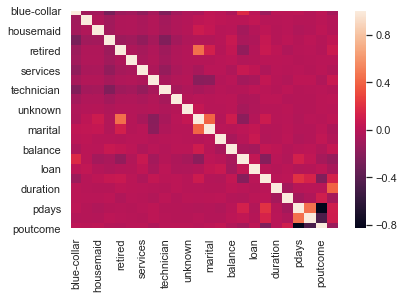

In [24]:
corrMatrix = bank_data_new.corr()
sns.heatmap(corrMatrix)
plt.show()

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
X_train

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
3344,1,0,0,0,0,0,0,0,0,0,0,41,blue-collar,1,primary,0,849,1,0,0,72,1,-1,0,3
17965,0,0,0,0,0,0,0,0,1,0,0,49,technician,1,primary,0,1415,1,0,1,269,2,-1,0,3
18299,0,0,0,0,0,0,0,0,0,0,0,42,admin.,1,secondary,0,3842,0,0,1,130,4,-1,0,3
10221,0,0,0,1,0,0,0,0,0,0,0,37,management,0,tertiary,0,-119,1,0,0,375,11,-1,0,3
32192,1,0,0,0,0,0,0,0,0,0,0,56,blue-collar,1,primary,0,3498,0,0,1,264,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,1,0,0,0,0,0,0,0,0,44,housemaid,0,primary,0,1059,0,0,0,2093,1,-1,0,3
44732,0,0,0,0,0,0,0,1,0,0,0,23,student,0,tertiary,0,508,0,0,1,210,1,92,1,0
38158,0,0,0,0,0,0,0,0,1,0,0,34,technician,2,tertiary,0,1317,1,0,1,239,1,-1,0,3
860,0,0,0,0,1,0,0,0,0,0,0,33,retired,1,secondary,0,165,0,0,0,111,1,-1,0,3


In [30]:
bank_data_dumy = pd.get_dummies(bank_data_new['education'], drop_first=True)
bank_data_final = pd.concat([bank_data_dumy,bank_data_new], axis=1)
bank_data_final.head()

,secondary,tertiary,unknown,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,58,management,1,tertiary,0,2143,1,0,0,261,1,-1,0,3,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,44,technician,0,secondary,0,29,1,0,0,151,1,-1,0,3,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,33,entrepreneur,1,secondary,0,2,1,1,0,76,1,-1,0,3,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,47,blue-collar,1,unknown,0,1506,1,0,0,92,1,-1,0,3,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,33,unknown,0,unknown,0,1,0,0,0,198,1,-1,0,3,0


In [31]:
bank_data_final.drop(columns=['job','education'], axis=1, inplace=True)
bank_data_final.head()

,secondary,tertiary,unknown,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,age,marital,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,58,1,0,2143,1,0,0,261,1,-1,0,3,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,44,0,0,29,1,0,0,151,1,-1,0,3,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,33,1,0,2,1,1,0,76,1,-1,0,3,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,47,1,0,1506,1,0,0,92,1,-1,0,3,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,33,0,0,1,0,0,0,198,1,-1,0,3,0


In [33]:
bank_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
secondary        45211 non-null uint8
tertiary         45211 non-null uint8
unknown          45211 non-null uint8
blue-collar      45211 non-null uint8
entrepreneur     45211 non-null uint8
housemaid        45211 non-null uint8
management       45211 non-null uint8
retired          45211 non-null uint8
self-employed    45211 non-null uint8
services         45211 non-null uint8
student          45211 non-null uint8
technician       45211 non-null uint8
unemployed       45211 non-null uint8
unknown          45211 non-null uint8
age              45211 non-null int64
marital          45211 non-null int64
default          45211 non-null int64
balance          45211 non-null int64
housing          45211 non-null int64
loan             45211 non-null int64
contact          45211 non-null int64
duration         45211 non-null int64
campaign         45211 non-null int64
pdays            

In [35]:
X = bank_data_final.iloc[:,:-1]
Y = bank_data_final.iloc[:,-1]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(36168, 26)

In [38]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[7778,  174],
       [ 852,  239]])

In [44]:
classifier.score(X_test, Y_test)

0.8865420767444432

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043

